In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='time_varying')


def Hval(point):
    x, y, z = point
    
    if x < 0:
        return (0, 0, 1e6)
    else:
        return (0, 0, 1e6)

H = df.Field(mesh, dim=3, value=Hval)

system.energy = mm.Zeeman(H=H, wave='sin', f=5e9, t0=1e-9)
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=1e-5)

Ms = 1.1e6

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms)

Running OOMMF (ExeOOMMFRunner) [2020/12/31 20:51]... (1.4 s)


/home/marijanbeg/miniconda3/envs/ud/lib/python3.8/site-packages/matplotlib/quiver.py:686: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/marijanbeg/miniconda3/envs/ud/lib/python3.8/site-packages/matplotlib/quiver.py:686: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


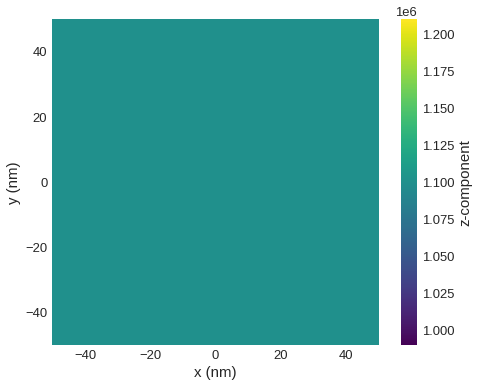

In [2]:
# minimize the energy
td = mc.TimeDriver()
td.drive(system, t=2e-9, n=100)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [3]:
system.m.orientation((-20e-9, 0, 0))

(0.0, 0.0, 1.0)

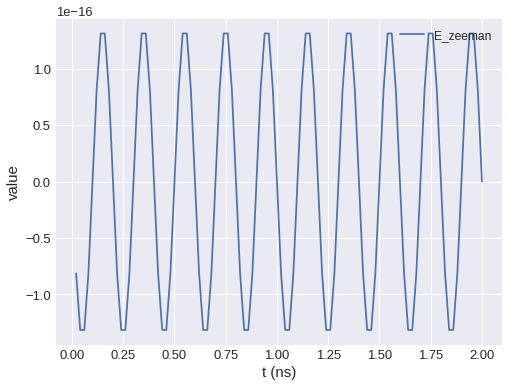

In [5]:
system.table.mpl(y=['E_zeeman'])

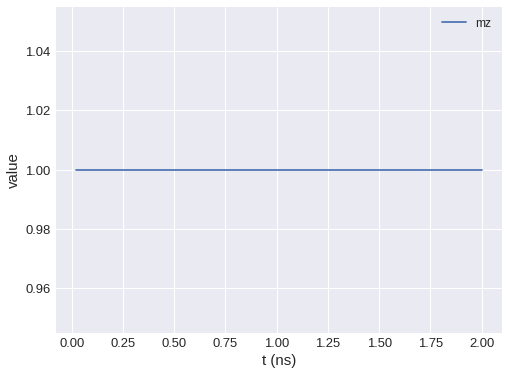

In [6]:
system.table.mpl(y=['mz'])

In [7]:
system.table

               E  E_calc_count  max_dm/dt     dE/dt       delta_E  \
0  -8.124960e-17          13.0        0.0 -0.000004 -2.835124e-17   
1  -1.314646e-16          20.0        0.0 -0.000001 -5.021501e-17   
2  -1.314646e-16          27.0        0.0  0.000001  1.164153e-31   
3  -8.124960e-17          34.0        0.0  0.000004  5.021501e-17   
4   1.523547e-31          41.0        0.0  0.000004  8.124960e-17   
..           ...           ...        ...       ...           ...   
95  8.124960e-17         678.0        0.0  0.000004  8.124960e-17   
96  1.314646e-16         685.0        0.0  0.000001  5.021501e-17   
97  1.314646e-16         692.0        0.0 -0.000001  7.217750e-30   
98  8.124960e-17         699.0        0.0 -0.000004 -5.021501e-17   
99  1.244658e-29         706.0        0.0 -0.000004 -8.124960e-17   

        E_zeeman  iteration  stage_iteration  stage   mx   my   mz  \
0  -8.124960e-17        2.0              2.0    0.0  0.0  0.0  1.0   
1  -1.314646e-16        4.0    

In [7]:
import micromagneticmodel as mm

In [8]:
mm.__version__

'0.8.21'

In [15]:
a = ['r1', 'r2']
f'{{main_atlas {" ".join(a)}}}'

'{main_atlas r1 r2}'